In [19]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [20]:
sql_conn = sqlite3.connect('../data/checking-logs.sqlite')

In [21]:
query = """
    SELECT timestamp
    FROM checker
    WHERE uid LIKE 'user_%'
"""
df_commits = pd.io.sql.read_sql(query, sql_conn, parse_dates=['timestamp'])
df_commits['date'] = df_commits.timestamp.dt.date
df_commits['hour'] = df_commits.timestamp.dt.hour
df_commits['dayofweeks'] = df_commits.timestamp.dt.dayofweek
df_commits['day'] = df_commits.dayofweeks.agg(lambda x: 'weekend' if x > 4 else 'working_day')
df_commits.drop(['timestamp'], axis=1, inplace=True)
df_commits.head()

,date,hour,dayofweeks,day
0,2020-04-17,5,4,working_day
1,2020-04-17,5,4,working_day
2,2020-04-17,5,4,working_day
3,2020-04-17,5,4,working_day
4,2020-04-17,5,4,working_day


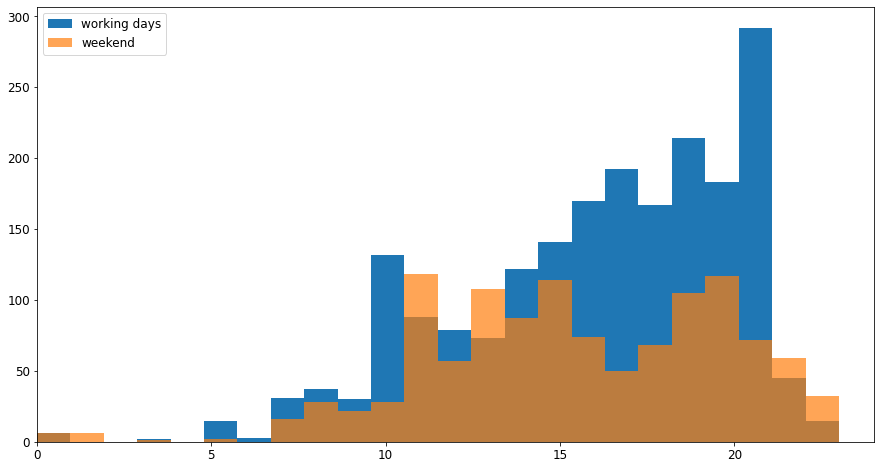

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.rc('font', size=12)
ax.hist(df_commits[df_commits.day=='working_day'].hour, bins=24, label='working days')
ax.hist(df_commits[df_commits.day == 'weekend'].hour, bins=24, alpha=0.7, label='weekend')
ax.legend()
ax.set_xlim(0, 24)
plt.show()

## Are there hours when the total number of commits was higher on weekends than on working days?
Answer: 11, 13, 22, 23

In [23]:
sql_conn.close()